# Advanced Network Analysis with CVXPY: A Tutorial

This tutorial is designed to provide a deep dive into using CVXPY for network analysis, from theoretical concepts to practical applications. We'll start with an introduction to convex optimization, proceed to a hypothetical example, and then apply our knowledge to a real-world dataset.

## Introduction to Convex Optimization

Convex optimization is a subfield of optimization that deals with finding the minimum of convex functions over convex sets. The significance of convexity lies in the property that any local minimum is a global minimum. This makes convex optimization problems particularly appealing because they can be solved efficiently and reliably.

A convex optimization problem typically takes the form:

$
\text{minimize } f(x)
$
$
\text{subject to } g_i(x) \leq 0, \quad i=1,\ldots,m
$
$
h_j(x) = 0, \quad j=1,\ldots,p
$

where $f(x)$ is the objective function to be minimized, $g_i(x) \leq 0$ are inequality constraints, and $h_j(x) = 0$ are equality constraints. Both $f(x)$ and $g_i(x)$ must be convex functions, and $h_j(x)$ must be affine.

## CVXPY Overview

[CVXPY](https://www.cvxpy.org/) is a Python library for convex optimization that simplifies the process of problem formulation and solution. It provides a high-level interface for defining optimization problems in a readable and intuitive way.

### Installing CVXPY

Ensure CVXPY is installed in your environment:

```bash
pip install cvxpy


Now considering the installation is complete, in order to understand cvxpy, we need to first understand convex optimization. To do this, let's cover how to solve it with the help of an example.

### Hypothetical Convex Optimization Example
Let's start with a simple example to minimize a quadratic function, which is a common form of a convex function:

$
\text{minimize } f(x) = 2x^2 + 5x + 1
$

This function is convex because its second derivative (4, in this case) is positive across its domain, ensuring any local minimum is also a global minimum.

### Solving the Problem Manually

To find the minimum of $f(x)$, we set its derivative equal to zero and solve for $x$:

$
\frac{df(x)}{dx} = 4x + 5 = 0
$

Solving for $x$ gives us:

$
x = -\frac{5}{4}
$

Substituting $x = -\frac{5}{4}$ back into $f(x)$ gives us the minimum value of the function:

$
f\left(-\frac{5}{4}\right) = 2\left(-\frac{5}{4}\right)^2 + 5\left(-\frac{5}{4}\right) + 1 = -\frac{9}{8}
$

Therefore, the minimum value of $f(x)$ is $-\frac{9}{8}$, achieved at $x = -\frac{5}{4}$.

### Insight

This manual process highlights the essence of convex optimization: finding the global minimum through gradient-based methods. For more complex or multidimensional functions, manual solutions become impractical, which is where tools like CVXPY excel by automating and efficiently solving these problems.

## Transitioning to CVXPY

Having manually solved a basic convex optimization problem, let's see how CVXPY streamlines this process for more complex scenarios, including those involving networks. Following the manual solution, the CVXPY code snippet provided earlier illustrates how the library simplifies solving the same problem:

```python
import cvxpy as cp

x = cp.Variable()
objective = cp.Minimize(2*x**2 + 5*x + 1)
problem = cp.Problem(objective)
result = problem.solve()

print(f"Optimal value for x: {x.value}")
print(f"Minimum value of the function: {result}")


In [1]:
#install
!pip install -U cvxpy

  Using cached cvxpy-1.4.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.2 MB)
  Using cached ecos-2.0.13-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (220 kB)
  Using cached scs-3.2.4.post1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.4 MB)
  Using cached clarabel-0.7.1-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)
  Using cached pybind11-2.12.0-py3-none-any.whl (234 kB)
  Using cached osqp-0.6.5-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (298 kB)
  Using cached qdldl-0.1.7.post1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)


In [1]:
#so actually solving it now
import cvxpy as cp

# Define the variable
x = cp.Variable()

# Define the objective function
objective = cp.Minimize(2*x**2 + 5*x + 1)

# Define the problem
problem = cp.Problem(objective)

# Solve the problem
result = problem.solve()

print("Optimal value for x:", x.value)
print("Minimum value of the function:", result)


Optimal value for x: -1.2499999999999998
Minimum value of the function: -2.125


### Analyzing a Network with Hypothetical Data
Suppose we have a simple network represented by nodes and edges, where nodes represent points of interest, and edges represent paths between them with associated costs. Our objective is to minimize the total cost of traveling across the network.

### Creating a Hypothetical Dataset
For our hypothetical dataset, we'll manually create data representing a network of four nodes and the costs associated with traveling between them.

### Visualizing the Network with NetworkX
Before we dive into optimization with CVXPY, let's visualize our network using NetworkX.

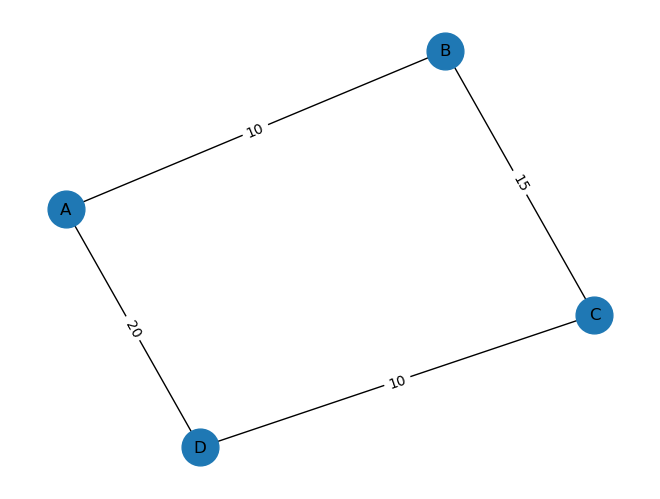

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph object
G = nx.Graph()

# Add edges between nodes with weights (costs)
G.add_edge('A', 'B', weight=10)
G.add_edge('B', 'C', weight=15)
G.add_edge('C', 'D', weight=10)
G.add_edge('A', 'D', weight=20)

# Draw the network
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


### Applying CVXPY to a more complicated problem to find and plot an optimal path